In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive(1).zip to archive(1).zip


In [2]:
import pandas as pd

df = pd.read_csv("archive(1).zip")
df.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.0
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.0
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.0


In [3]:
df = df.dropna()  #есть ли пропуски в данных? если да, то удалите их
print(df.shape) #размерность данных
print("-"*50)
df.dtypes #Типы переменных в данных

(264, 7)
--------------------------------------------------


Date                object
Profession          object
Rank                 int64
Equipment           object
Insalubrity          int64
Size_Production      int64
Salary             float64
dtype: object

Видно, что категориальных признаков 3.


In [4]:
print( df['Profession'].unique() )
print("-"*50)
df['Profession'].value_counts()

['Metal heater' 'Metal planter' 'Refractory' 'Roller' 'Roller assistant'
 'Hot metal cutter' 'Cleaner' 'Operator' 'Quality controller']
--------------------------------------------------


Metal heater          60
Roller                60
Roller assistant      36
Operator              36
Cleaner               24
Metal planter         12
Refractory            12
Hot metal cutter      12
Quality controller    12
Name: Profession, dtype: int64

In [5]:
print(df['Date'].unique())
print("-"*50)
df['Date'].value_counts()

['2009-01-01' '2009-02-01' '2009-03-01' '2009-04-01' '2009-05-01'
 '2009-06-01' '2009-07-01' '2009-08-01' '2009-09-01' '2009-10-01'
 '2009-11-01' '2009-12-01']
--------------------------------------------------


2009-01-01    22
2009-02-01    22
2009-03-01    22
2009-04-01    22
2009-05-01    22
2009-06-01    22
2009-07-01    22
2009-08-01    22
2009-09-01    22
2009-10-01    22
2009-11-01    22
2009-12-01    22
Name: Date, dtype: int64

In [6]:
print(df['Equipment'].unique())
print("-"*50)
df['Equipment'].value_counts()

['Heating furnaces' 'Piercing mill' 'Pilgrim mill' 'Sizing mill'
 'Auxiliary premises' 'Control and measuring equipment']
--------------------------------------------------


Heating furnaces                   84
Pilgrim mill                       72
Sizing mill                        48
Piercing mill                      36
Auxiliary premises                 12
Control and measuring equipment    12
Name: Equipment, dtype: int64

In [7]:
from sklearn import preprocessing

# Создадим модель кодировщика
label_encoder = preprocessing.LabelEncoder() 
label_encoder1 = preprocessing.LabelEncoder() 
label_encoder2 = preprocessing.LabelEncoder() 

# Обучение кодировщика: по сути тут создает словарь уникальных слов из переданного массива, 
# соотносит для каждого слова число (все что делали выше мы, только тут автоматизированно)
label_encoder.fit(df['Profession']) 
label_encoder1.fit(df['Date']) 
label_encoder2.fit(df['Equipment']) 

# на этом этапе по сути применяет полученный словарь в переданным данных (в данном случае мы передали столбец lunch)
df['Profession'] = label_encoder.transform(df['Profession']) 
df['Date'] = label_encoder1.transform(df['Date']) 
df['Equipment'] = label_encoder2.transform(df['Equipment']) 

df.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,0,2,7,2,22,580,26020.0
1,0,2,6,2,22,580,22980.0
2,0,2,5,2,22,580,20350.0
3,0,2,5,2,22,580,20350.0
4,0,2,4,2,22,580,18090.0


In [8]:
print(label_encoder.classes_)
print("-"*50)
print(label_encoder1.classes_)
print("-"*50)
label_encoder2.classes_

['Cleaner' 'Hot metal cutter' 'Metal heater' 'Metal planter' 'Operator'
 'Quality controller' 'Refractory' 'Roller' 'Roller assistant']
--------------------------------------------------
['2009-01-01' '2009-02-01' '2009-03-01' '2009-04-01' '2009-05-01'
 '2009-06-01' '2009-07-01' '2009-08-01' '2009-09-01' '2009-10-01'
 '2009-11-01' '2009-12-01']
--------------------------------------------------


array(['Auxiliary premises', 'Control and measuring equipment',
       'Heating furnaces', 'Piercing mill', 'Pilgrim mill', 'Sizing mill'],
      dtype=object)

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [10]:
# Выделим вектор признаков и вектор целевой переменной

X = df[['Date', 'Profession', 'Rank', 'Equipment', 'Insalubrity', 'Size_Production']].values

y = df['Salary'].values
# y = w0 + x1*w1 + ... x13*w13

In [11]:
features = pd.Series(['Date', 'Profession', 'Rank', 'Equipment', 'Insalubrity', 'Size_Production'])
features

0               Date
1         Profession
2               Rank
3          Equipment
4        Insalubrity
5    Size_Production
dtype: object

In [12]:
# Создадим модель линейной регрессии
slr = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
slr.fit(X, y)

# так как у нас много признаков, а не один как в предыдушем примере,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,-66.194960,Date
1,9.668707,Profession
2,2754.813385,Rank
3,-71.163502,Equipment
4,170.653179,Insalubrity
5,7.646024,Size_Production


In [13]:
slr.intercept_

-2184.299390216682

In [14]:
# Сделаем все тоже самое, но только возьмем один признак для построениея модели

# выделим вектор признака и вектор ответов
X = df[['Rank']].values
y = df['Salary'].values

# создадим модель линейной регрессии
slr = LinearRegression()

slr.fit(X, y)

y_pred = slr.predict(X)

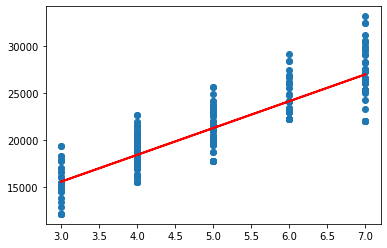

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)

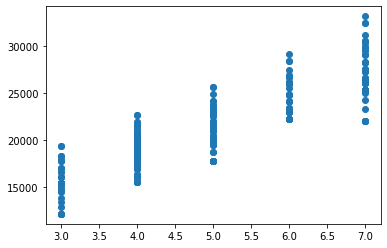

In [16]:
plt.scatter(X, y)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 4684673.185
